# 서브플롯

Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 2개 이상의 시각화 결과물을 하나의 화면에서 표현 가능

### 1. 필요한 패키지 및 샘플 데이터 준비

#### 1) 패키지 참조

In [29]:
import numpy as np
from pandas import DataFrame, read_excel, to_datetime
from matplotlib import pyplot as plt

#### 2) 데이터 가져오기

데이터 출처: KOSIS 국가통계포털

In [48]:
발생건수 = [214171, 213745, 211662, 215822, 231990, 226878, 221711, 223656, 215354,
         223552, 232035, 220917, 216335, 217148]
사망자수 = [6376, 6327, 6166, 5870, 5838, 5505, 5229, 5392, 5092,
         4762, 4621, 4292, 4185, 3781]
부상자수 = [342233, 340229, 335906, 338962, 361875, 352458, 341391, 344565, 328711,
         337497, 350400, 331720, 322829, 323037]

df = DataFrame({'년도': range(2005, 2019),
                '발생건수': 발생건수,
                '사망자수': 사망자수,
                '부상자수': 부상자수}).set_index('년도')
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 3) 그래프에 대한 전역 환경 설정
- Pyplot 객체의 한글 폰트, 글자크기, 그래픽 사이즈 설정
- 이 코드가 다시 실행되기 전까지 모든 그래프 출력에 적용

In [49]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

### 2. 서브플롯 영역 나누기
- fig, ax = plt.subplots(행수, 열수)

#### 1) 2행 3열을 갖는 서브플롯 영역 생성

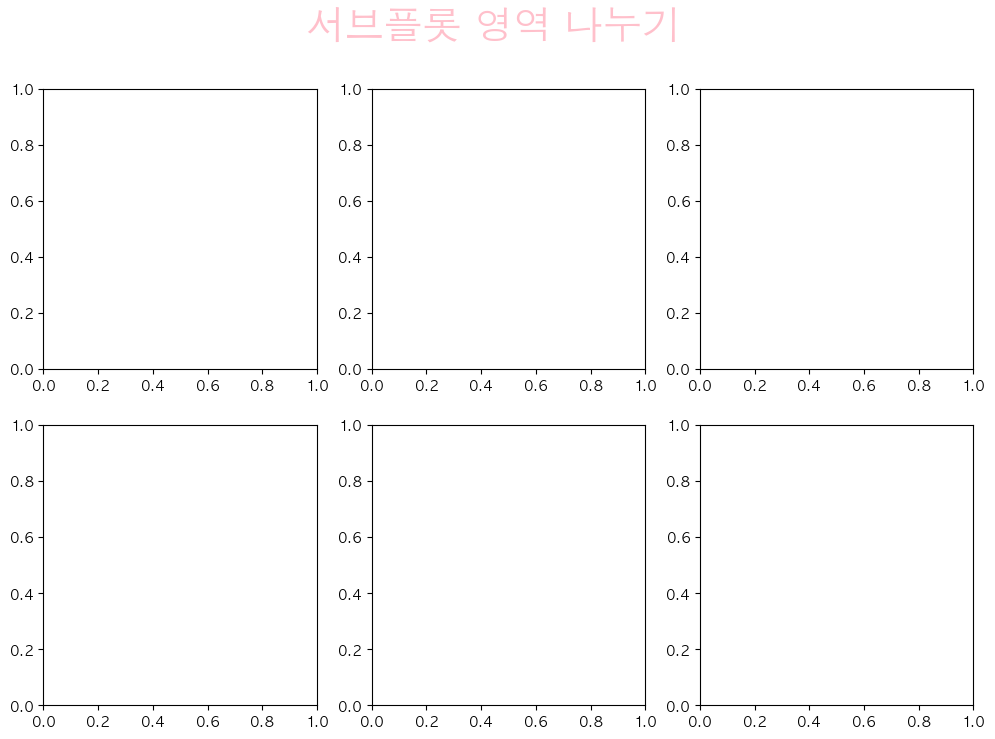

In [50]:
# 서브플롯 생성 -> 2행 3열
# -> fig 객체: 그래픽 처리 기능 제공
# -> ax 객체: 분할된 각 그래프 영역 (리스트)
fig, ax = plt.subplots(2, 3)

# 전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize = 28, color = 'pink')

# 각 그래프 간 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

plt.show()
plt.close()

### 3. 서브플롯에 그래프 그리기

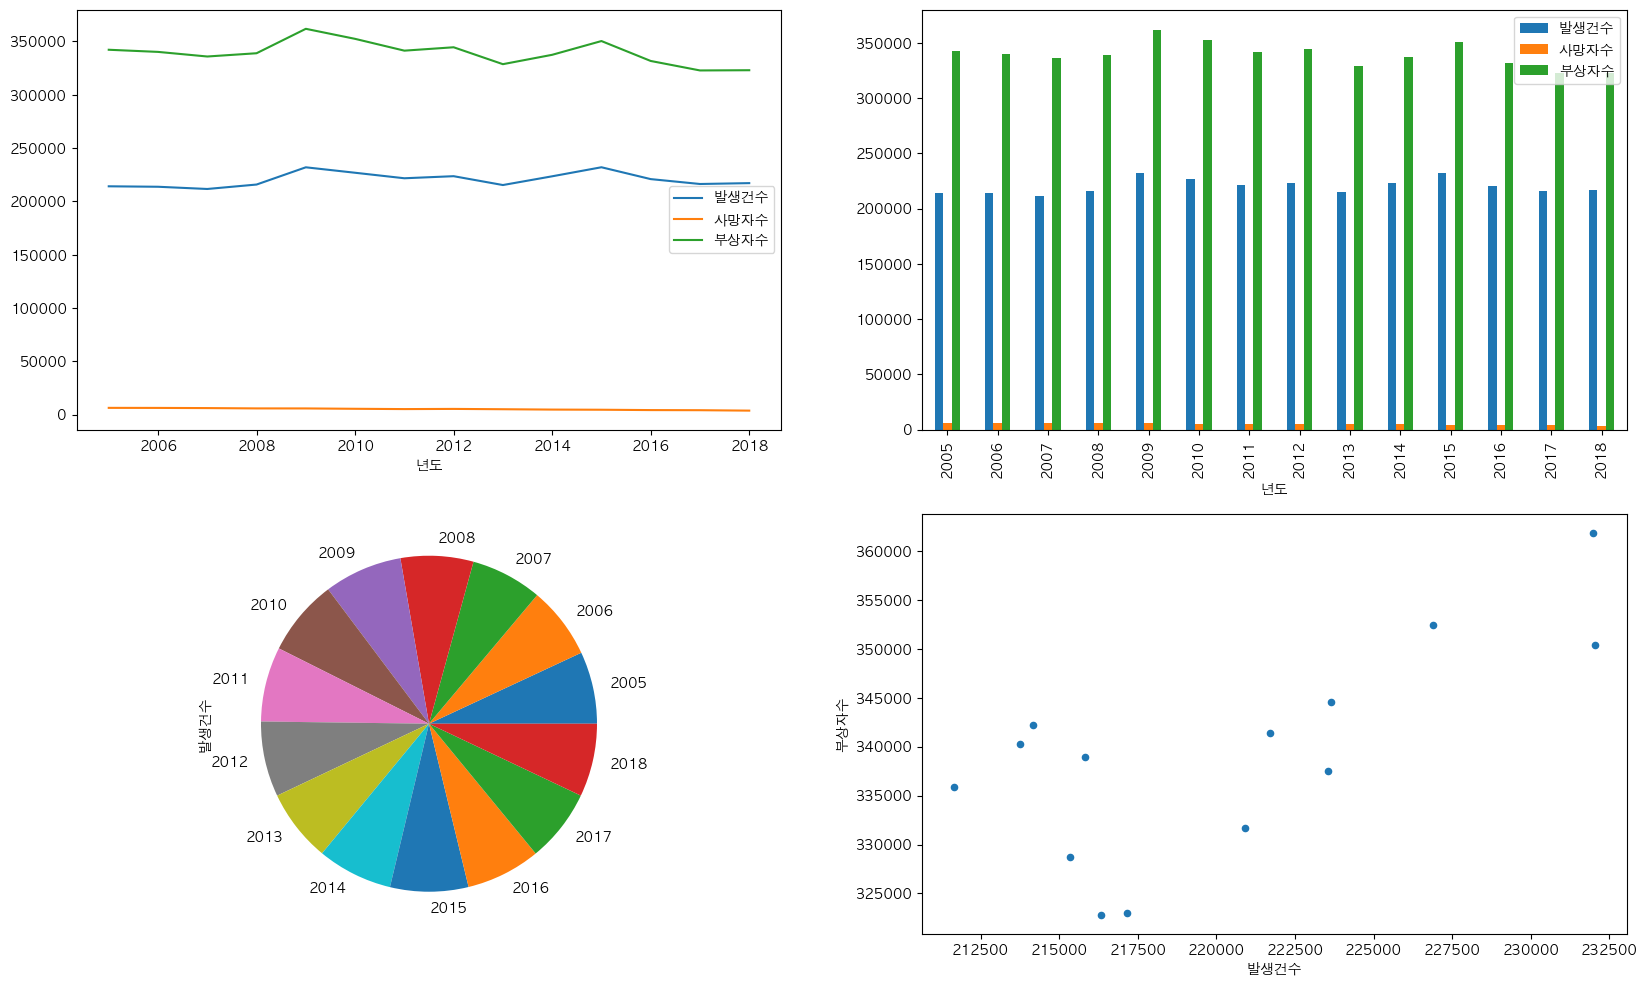

In [51]:
# 2행 2열의 영역 생성
# -> ax에 반환되는 객체는 서브플롯의 행, 열에 대한 n차원 리스트이다
# -> figsize 파라미터는 그래픽의 크기: plt.rcParams['figure.figsize'] 설정보다 우선시 됨
fig, ax = plt.subplots(2, 2, figsize = (20, 12))

# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax = ax[0][0])                                  # 선
df.plot.bar(ax=ax[0][1])                                # 막대
df['발생건수'].plot.pie(ax=ax[1][0])                      # 파이
df.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][1])    # 산점도

# 그래프 출력
plt.show()
plt.close()

### 4. 서브플롯 영역에 옵션 지정하기

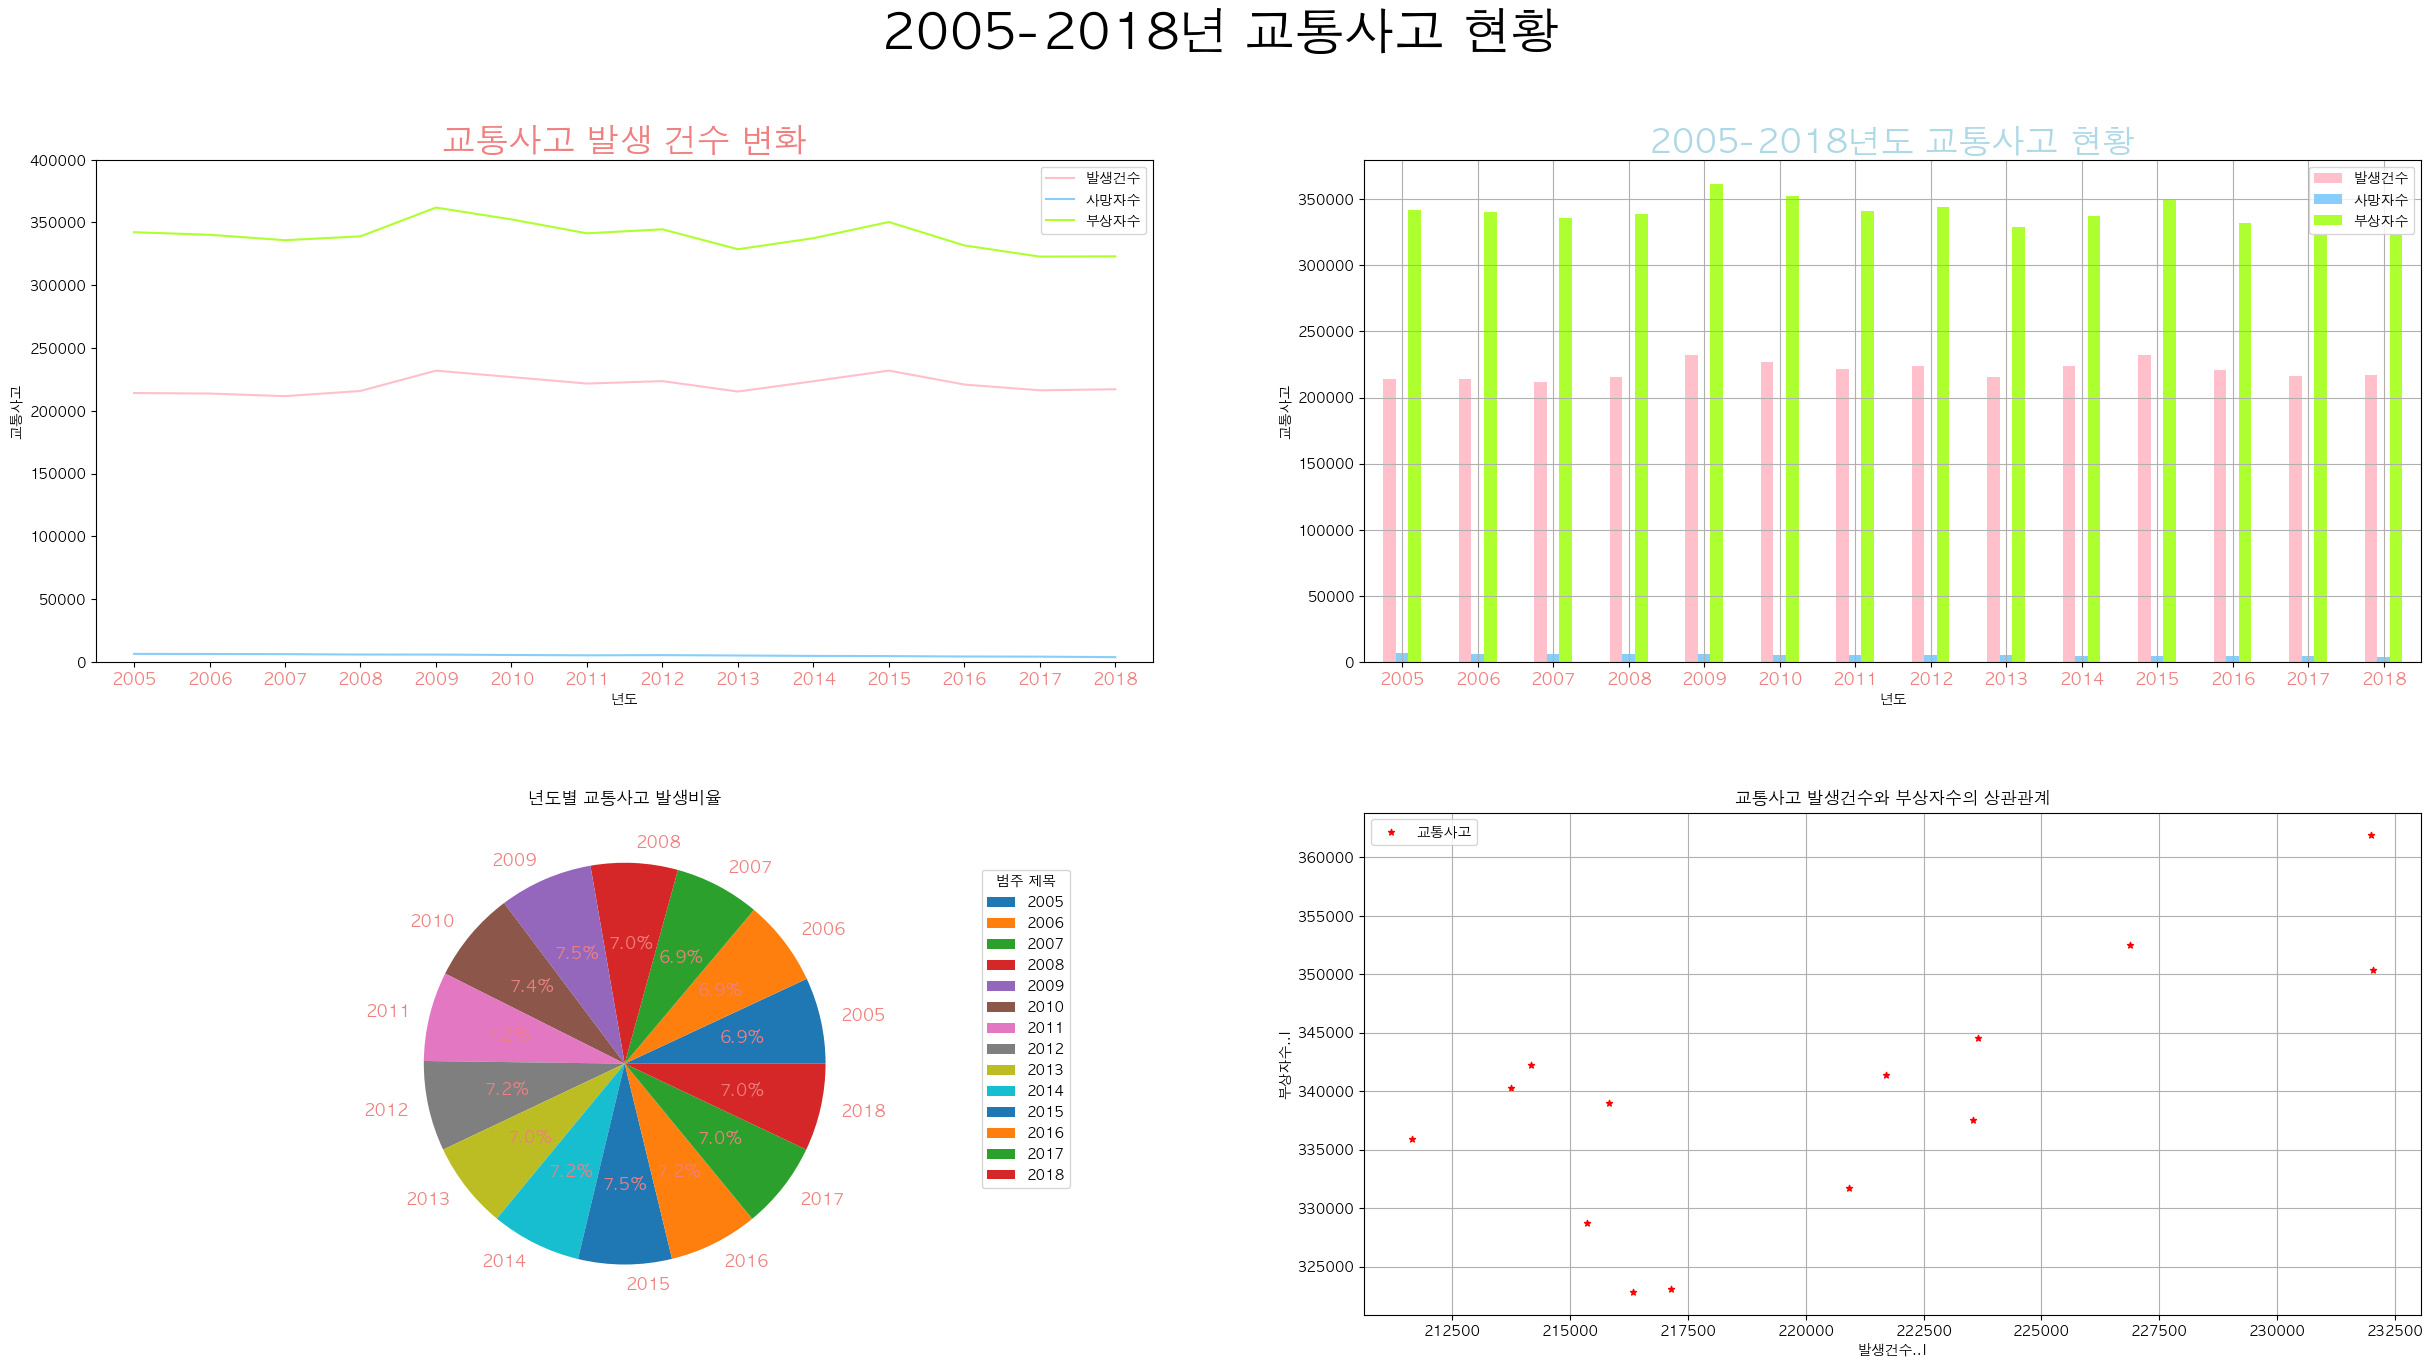

In [52]:
#---------------------------
# 2행 2열의 영역 생성
#---------------------------
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (30, 15))

# 전체 제목
fig.suptitle('2005-2018년 교통사고 현황', fontsize = 36, color = '#000000')

# 각 그래프 간 가로, 시로 간격 지정
fig.subplots_adjust(wspace = 0.2, hspace=0.3)

#---------------------------
# 첫 번째 영역 표시 - 선 그래프
#---------------------------
df.plot(ax=ax1, color=['pink', 'lightskyblue', 'greenyellow'])

# 그래프 제목의 텍스트, 글자크기, 글자굵기, 색상
ax1.title.set_text('교통사고 발생 건수 변화')
ax1.title.set_fontsize(24)
ax1.title.set_fontweight('bold')
ax1.title.set_color('lightcoral')

# x축과 y축의 라벨을 지정(불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# plt를 직접 사용할 경우 xticks(x축좌표, 표시할텍스트) 형식으로 지정하나 서브플롯은 x축의 좌표와 표시할텍스트를 나눠서 처리함
start = min(df.index)
end = max(df.index)
x = list(range(start, end+1))
# -> 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트 지정
ax1.set_xticklabels(df.index, fontsize = 12, color = 'lightcoral')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 400000])

#---------------------------
# 두 번째 영역 표시 - 막대 그래프
#---------------------------
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0으로 재지정
df.plot.bar(ax=ax2, rot=0, color=['pink', 'lightskyblue', 'greenyellow'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 글자굵기, 색상
ax2.title.set_text('2005-2018년도 교통사고 현황')
ax2.title.set_fontsize(24)
ax2.title.set_fontweight('bold')
ax2.title.set_color('lightblue')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트 지정
ax2.set_xticklabels(df.index, fontsize = 12, color = 'lightcoral')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel = '년도', ylabel = '교통사고')

#---------------------------
# 세 번째 영역 표시 - 파이 그래프
#---------------------------
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct='%0.1f%%', 
                    textprops={'color': 'lightcoral', 'fontsize': 12})

# 그래프 제목
ax3.title.set_text('년도별 교통사고 발생비율')

# 격자표시 -> 파이 그래프인 경우는 표시 안 됨
ax3.grid() # 이거 쓰나 안 쓰나 변화 없음

# y축 라벨이 불필요하므로 제거 - 제거 안 할시 y축 라벨 표시됨
ax3.set(ylabel=None)

# 범주 표시: bbox_to_anchor로 자리 지정
ax3.legend(labels=df.index, title = '범주 제목', bbox_to_anchor = (1.4, 0.9))

#---------------------------
# 네 번째 영역 표시 - 산점도 그래프
#---------------------------
df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', 
                color='red', marker='*', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text('교통사고 발생건수와 부상자수의 상관관계')

# 배경 격자
ax4.grid()

# x축, y축 라벨
ax4.set(xlabel='발생건수..!', ylabel='부상자수..!')

#---------------------------
# 그래프 출력
#---------------------------
plt.show()
plt.close()

### 5. 두 개의 y축을 갖는 그래프

#### 1) 샘플 데이터 만들기

In [53]:
# x축 데이터 (공용)
x = list(range(0, 10))
x # >> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 첫 번째 y축 데이터
y1 = list(range(0, 10, 1))
y1 # >> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 두 번째 y축 데이터
y2 = list(np.arange(0, 5, 0.5))
y2 # >> [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

#### 2) 기본 그래프 구현

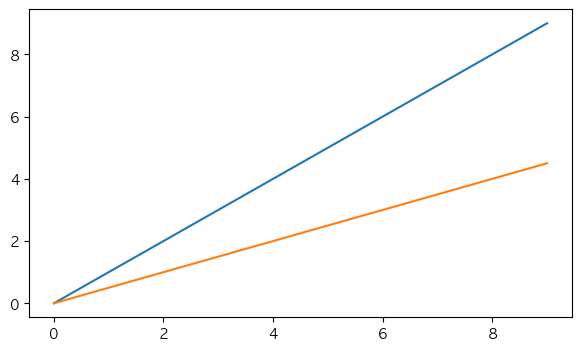

In [54]:
plt.rcParams["figure.figsize"] = (7, 4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

#### 3) 서브플롯으로 2개의 y축을 갖는 그래프 구현

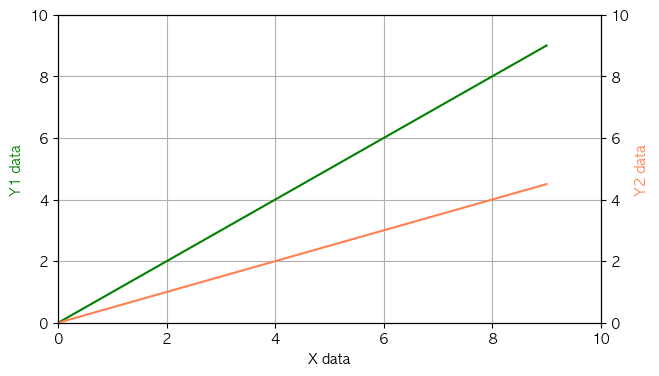

In [55]:
# 그래프 시작
fig, ax1 = plt.subplots(1, 1, figsize = (7, 4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color = 'green')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color = 'green')
ax1.grid()
ax1.set_ylim([0, 10])

# ax2에 그래프 그리기
ax2.plot(x, y2, color = 'coral')
ax2.set_ylabel('Y2 data', color = 'coral')
ax2.set_ylim([0, 10])

# x축 범위 지정
plt.xlim(0, 10)

plt.show()
plt.close()

### 6. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기

우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.

이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자.

#### 그래프 그리기

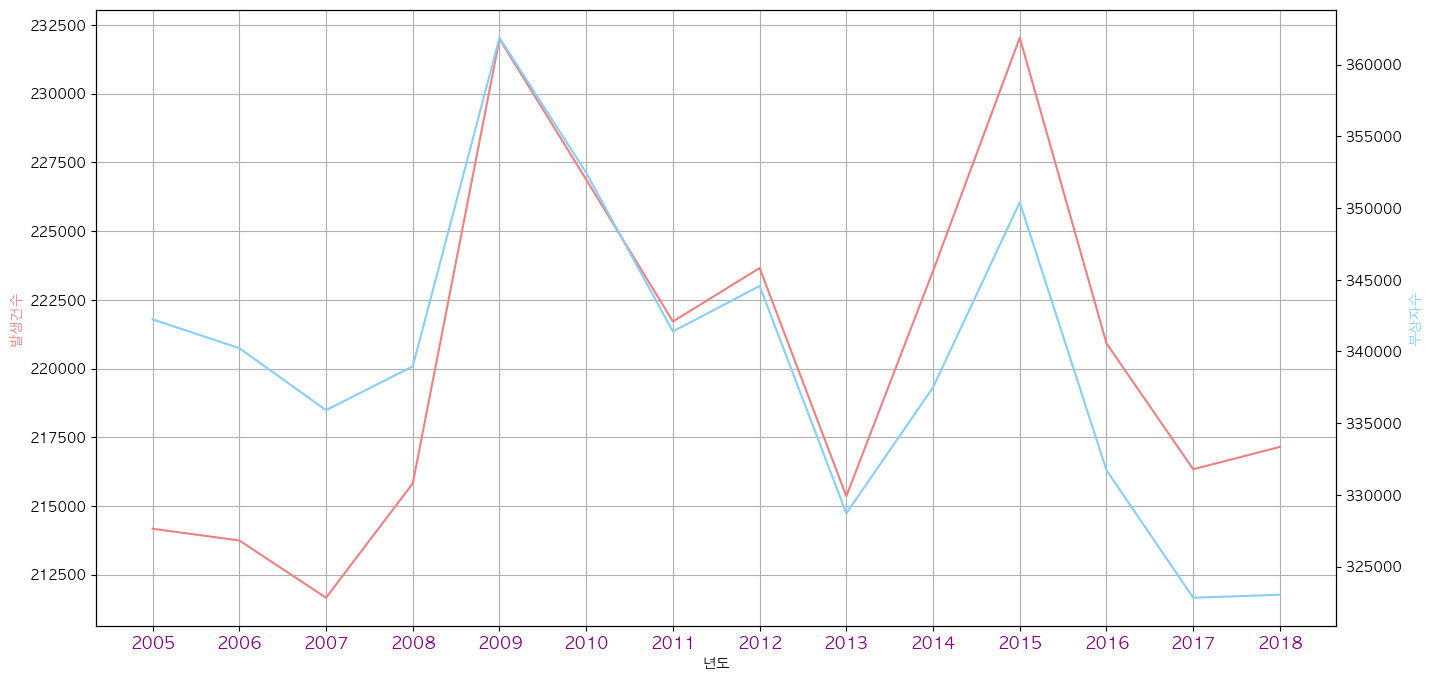

In [56]:
fig, ax1 = plt.subplots(1, 1, figsize = (16, 8))
ax2 = ax1.twinx() # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color = 'lightcoral')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color = 'lightcoral')
ax1.grid()

# x축 좌표 위의 텍스트 처리
start = min(df.index);
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(df.index, fontsize = 12, color = 'purple')

# ax2에 그래프 그리기
df['부상자수'].plot(ax = ax2, color = 'lightskyblue')
ax2.set_ylabel('부상자수', color = 'lightskyblue')

plt.show()
plt.close()

### 데이터 분석
- 사실1: 2008년도를 기준으로 법이 개정되었다.
- 그러므로 이에 대한 효과는 2008년도 이후로 발생하기 시작
- 사실2: 2008년도까지는 교통사고 발생건수와 부상자수의 갭이 있었다.
- 사실3: 2008 후에는 교통사고 발생건수와 부상자수의 갭이 현저히 줄어들었다.
- 인사이트:
    - 즉, 법 개조로 인하여 자동차 제조 회사들이 안전장치를 꾸준히 강화한 것이 효과가 있는 것을 확인할 수 있다.
    - 그러므로 2008년도에 개정된 법/정책은 실용성이 있는 정책이었다 - 라고 결론을 낼 수 있다.